# Part I - WeatherPy
## First Requirement
#### Create a series of scatter plots to showcase the following relationships. After each plot add a sentence or two explaining what the code is and analyzing.

In [140]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import requests
import json
import random

from scipy.stats import linregress
from matplotlib.pyplot import figure
from scipy.stats import linregress
from sklearn import datasets

# Import API key
from config import api_key

# Import citipy library after installing; it returns the nearest city for the given latitude and longitude
from citipy import citipy

In [114]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" # Fahrenheit

# Build partial query URL
query_url = f"{base_url}appid={api_key}&units={units}&q="

In [260]:
# Get a list of cities
cities = []

coordinates = [] # also get the coordinates list

# Latitude varies from 0º at the equator to 90º North and South at the poles
# Longitude varies from 0º at the Greenwich to 180º East and West

# To get the cities at the coordinates within the ranges of latitude and longitude, identify the coordinates first
latitudes = np.random.uniform(low = -90, high = 90, size = 1500)
longitudes = np.random.uniform(low = -180, high = 180, size = 1500) 
# test the kernel data with a small size (e.g., size = 50) for faster processing speeds; 
# eventually, randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.

coordinates = zip(latitudes, longitudes)


counter = 0
for coordinate in coordinates:
    
    # use citipy library's functions to look up with coordinates
    # def __init__(self, city_name, country_code):
    nearby_city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name # (some latitude, some longitude)
    
    # Loop through the iterations; if a city is not yet in the list, add it to the "cities" list
    if nearby_city not in cities:
        cities.append(nearby_city)
        counter += 1

print(f'Now there are {len(cities)} cities in the list.') 
# Check whether there are ≥500 unique cities contained in the dataset

cities_df= pd.DataFrame ({"Cities": cities})
cities_df.head()

Now there are 585 cities in the list.


,Cities
0,reus
1,mys shmidta
2,bredasdorp
3,punta arenas
4,rikitea


In [261]:
cities

['reus',
 'mys shmidta',
 'bredasdorp',
 'punta arenas',
 'rikitea',
 'broome',
 'cape town',
 'labutta',
 'taolanaro',
 'albany',
 'vaini',
 'karatau',
 'bar harbor',
 'butaritari',
 'gisborne',
 'aklavik',
 'east london',
 'buala',
 'scarborough',
 'sisimiut',
 'santa fe',
 'upernavik',
 'mataura',
 'sentyabrskiy',
 'ponta do sol',
 'illoqqortoormiut',
 'gamba',
 'khatanga',
 'dingle',
 'ushuaia',
 'fortuna',
 'taoudenni',
 'barrow',
 'bethel',
 'jiuquan',
 'attawapiskat',
 'vardo',
 'hasaki',
 'srednekolymsk',
 'sao filipe',
 'port hawkesbury',
 'san cosme y damian',
 'benalmadena',
 'provideniya',
 'raudeberg',
 'alice springs',
 'marcona',
 'lubumbashi',
 'saleaula',
 'nikolskoye',
 'shirokiy',
 'bluff',
 'liverpool',
 'qaanaaq',
 'port hueneme',
 'hilo',
 'esperance',
 'avarua',
 'beboto',
 'oktyabrskoye',
 'lebu',
 'busselton',
 'port lincoln',
 'grand river south east',
 'trairi',
 'caceres',
 'amazar',
 'waipawa',
 'tuktoyaktuk',
 'tiksi',
 'cuamba',
 'temaraia',
 'pokosnoye',

In [262]:
# Check the json using a city example, e.g., brae
requests.get(query_url + "brae").json()

{'coord': {'lon': -1.35, 'lat': 60.4},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 57.2,
  'feels_like': 46.47,
  'temp_min': 57.2,
  'temp_max': 57.2,
  'pressure': 1014,
  'humidity': 93},
 'visibility': 7000,
 'wind': {'speed': 21.92, 'deg': 140},
 'clouds': {'all': 46},
 'dt': 1593147268,
 'sys': {'type': 1,
  'id': 1447,
  'country': 'GB',
  'sunrise': 1593139132,
  'sunset': 1593207455},
 'timezone': 3600,
 'id': 2654970,
 'name': 'Brae',
 'cod': 200}

In [301]:
# Loop through the list of cities and perform a request for data on each relationship
# (file review_(weather_stats))

city_name = []
country_code = []
lat = []
lng = []
temps = []
humidity = []
cloudiness = []
wind = []

counter = 0
for city in cities:
    try:
        geo_data = requests.get(query_url + city).json()
        # city name
        city_name.append(geo_data["name"]) #!!!
        # country code
        country_code.append(geo_data["sys"]["country"])
        # latitudes
        lat.append(geo_data["coord"]["lat"])
        # longitudes
        lng.append(geo_data["coord"]["lon"]) 
        # temperature
        temps.append(geo_data['main']['temp']) 
        # humidity
        humidity.append(geo_data['main']["humidity"]) #!!!
        # cloudiness
        cloudiness.append(geo_data["clouds"]["all"])
        # Wind Speed (mph)
        wind.append(geo_data["wind"]["speed"])
    except KeyError:  # e.g., KeyError: 'coord'
        counter += 1

In [302]:
weather_dict = pd.DataFrame({
                "Cities": city_name,
                "Country codes": country_code,
                "Latitudes": lat,
                "Longitudes": lng,
                "Temperatures (Fº)": temps,
                "Humidity (%)": humidity,
                "Cloudiness (%)": cloudiness,
                "Wind Speed (mph)": wind
                })

# Export the data
weather_dict.to_csv("output_data/weather_cities.csv", index = False)

weather_dict.head()
# ValueError: arrays must all be same length

,Cities,Country codes,Latitudes,Longitudes,Temperatures (Fº),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Reus,ES,41.16,1.11,71.15,72,5,4.70
1,Bredasdorp,ZA,-34.53,20.04,53.60,93,95,6.93
2,Punta Arenas,CL,-53.15,-70.92,26.60,86,51,9.17
3,Rikitea,PF,-23.12,-134.97,75.72,85,22,24.79
4,Broome,US,42.25,-75.83,57.09,93,1,6.93


In [303]:
weather_dict.count()

Cities               537
Country codes        537
Latitudes            537
Longitudes           537
Temperatures (Fº)    537
Humidity (%)         537
Cloudiness (%)       537
Wind Speed (mph)     537
dtype: int64

### Data Analysis: Scatterplots the relationships
 - Temperature (F) vs. Latitude 
 - Humidity (%) vs. Latitude 
 - Cloudiness (%) vs. Latitude 
 - Wind Speed (mph) vs. Latitude

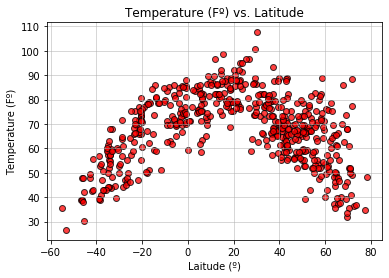

Analysis: The closer to the equator (the closer the latitude is to 0 degree), the higher the temperature is in the city, vice versa. Latitude is one of the main factors affecting temperature.


In [275]:
# Temperature (F) vs. Latitude 
plt.scatter(weather_dict["Latitudes"], weather_dict["Temperatures (Fº)"], facecolors="red", edgecolors="black", alpha=0.75)

plt.title("Temperature (Fº) vs. Latitude")
plt.xlabel("Laitude (º)")
plt.ylabel("Temperature (Fº)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("output_data/Images/1. Temperature (F) vs. Latitude.png")
plt.show()

print("Analysis: The closer to the equator (the closer the latitude is to 0 degree), the higher the temperature is in the city, vice versa. Latitude is one of the main factors affecting temperature.")

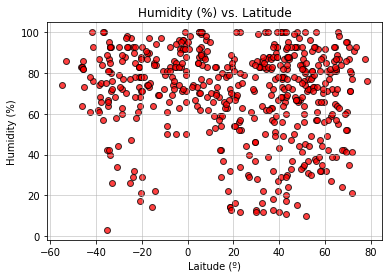

Analysis: Humidity is very weakly relevant to latitude.


In [271]:
# Humidity (%) vs. Latitude
plt.scatter(weather_dict["Latitudes"], weather_dict["Humidity (%)"], facecolors="red", edgecolors="black", alpha=0.75)

plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Laitude (º)")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("output_data/Images/2. Humidity (%) vs. Latitude.png")
plt.show()

print("Analysis: Humidity is very weakly (if at all) relevant to latitudes.")

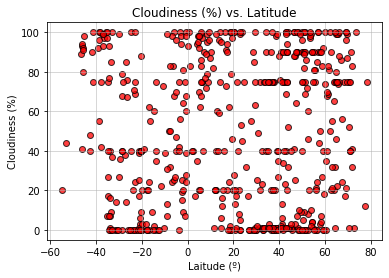

Analysis: Cloudiness is very weakly (if at all) relevant to latitudes.


In [285]:
# Cloudiness (%) vs. Latitude 
plt.scatter(weather_dict["Latitudes"], weather_dict["Cloudiness (%)"], facecolors="red", edgecolors="black", alpha=0.75)

plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Laitude (º)")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("output_data/Images/3. Cloudiness (%) vs. Latitude.png")
plt.show()

print("Analysis: Cloudiness is very weakly (if at all) relevant to latitudes.")

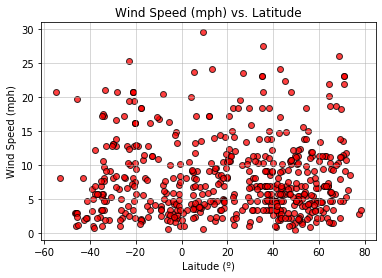

Analysis: Wind speed is weakly relevant to latitudes. The wind speed generally is around or below 20 mph.


In [276]:
# Wind Speed (mph) vs. Latitude
plt.scatter(weather_dict["Latitudes"], weather_dict["Wind Speed (mph)"], facecolors="red", edgecolors="black", alpha=0.75)

plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Laitude (º)")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("output_data/Images/4. Wind Speed (mph) vs. Latitude.png")
plt.show()

print("Analysis: Wind speed is weakly relevant to latitudes. The wind speed generally is around or below 20 mph.") 

## Second Requirement
#### Run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude). After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have. Optional:  You will be creating multiple linear regression plots. To optimize your code, write a function that creates the linear regression plots.
- Northern Hemisphere - Temperature (F) vs. Latitude 
- Southern Hemisphere - Temperature (F) vs. Latitude 
- Northern Hemisphere - Humidity (%) vs. Latitude 
- Southern Hemisphere - Humidity (%) vs. Latitude 
- Northern Hemisphere - Cloudiness (%) vs. Latitude 
- Southern Hemisphere - Cloudiness (%) vs. Latitude 
- Northern Hemisphere - Wind Speed (mph) vs. Latitude 
- Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [277]:
# Northern Hemisphere: ≥ 0 degrees latitude
# Southern Hemisphere: < 0 degrees latitude
north_hemisphere_lat = weather_dict.loc[weather_dict["Latitudes"] >= 0]
south_hemisphere_lat = weather_dict.loc[weather_dict["Latitudes"] < 0]

In [278]:
# Optional
# Define the linear regression, so as not to repeat all these steps for each relationship
def regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlim(-90, 90)
    # set the x limits of scatter plots to be -90 to +90, i.e., include both hemispheres, otherwise the annotations could be tricky because the x ranges of both hemipheres are symmetric to each other about y-axxis
    # the same reason goes for the y limits
    plt.ylim(-5,105)
    
    plt.annotate(line_eq,(30,55),fontsize=14,color="red")
    plt.annotate(f'R-squared = {round(rvalue**2, 2)}',(30,45),fontsize=14,color="red")
    plt.annotate(f"Pearson's r is {round(st.pearsonr(x_values, y_values)[0],2)}", (30,50),fontsize=14,color="red")
    
    # OR: Define a second annotate function annotations(), because when plt.annotate() is part of regression() function, the coordinates of the annotations will be fixed, yet the northern vs. southern hemispheres have different x-ranges
    # OR: Annotate in each kernel for each plot

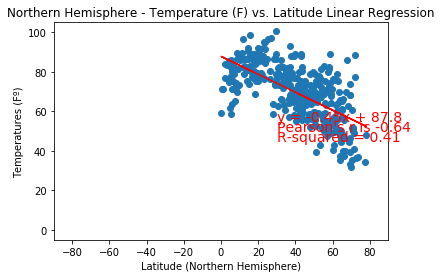

Analysis: There is a moderate negative correlation between temperature and latitude in the Northern hemisphere.


In [279]:
# Northern Hemisphere - Temperature (F) vs. Latitude
regression(north_hemisphere_lat["Latitudes"], north_hemisphere_lat["Temperatures (Fº)"])

plt.title("Northern Hemisphere - Temperature (F) vs. Latitude Linear Regression")
plt.xlabel("Latitude (Northern Hemisphere)")
plt.ylabel("Temperatures (Fº)")

plt.savefig("output_data/Images/5. Northern Hemisphere - Temperature (F) vs. Latitude.png")
plt.show()

print("Analysis: There is a moderate negative correlation between temperature and latitude in the Northern hemisphere.")

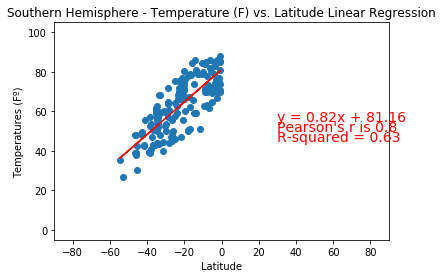

Analysis: There is a very strong positive correlation between temperature and latitude in the Southern hemisphere. The higher the latitude is, the colder it is.


In [289]:
# Southern Hemisphere - Temperature (F) vs. Latitude
regression(south_hemisphere_lat["Latitudes"], south_hemisphere_lat["Temperatures (Fº)"])

plt.title("Southern Hemisphere - Temperature (F) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temperatures (Fº)")

plt.savefig("output_data/Images/6. Southern Hemisphere - Temperature (F) vs. Latitude.png")
plt.show()

print("Analysis: There is a very strong positive correlation between temperature and latitude in the Southern hemisphere. The higher the latitude is, the colder it is.")

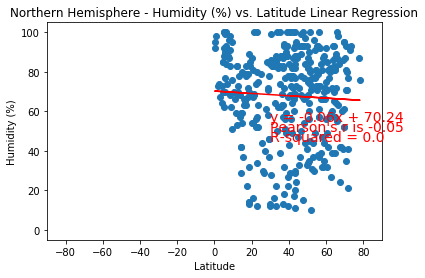

Analysis: There is a very weak negative correlation between humidity and latitude in the Northern hemisphere.


In [281]:
# Northern Hemisphere - Humidity (%) vs. Latitude
regression(north_hemisphere_lat["Latitudes"], north_hemisphere_lat["Humidity (%)"])

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/Images/7. Northern Hemisphere - Humidity (%) vs. Latitude.png")
plt.show()

print("Analysis: There is a very weak negative correlation between humidity and latitude in the Northern hemisphere.")

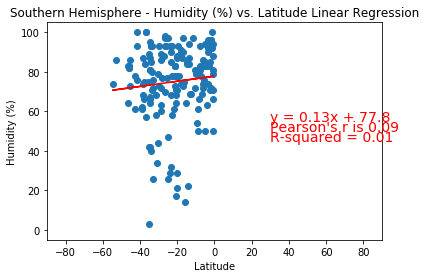

Analysis: There is a very weakly positive correlation between humidity and latitude in the Southern hemisphere.


In [290]:
# Southern Hemisphere - Humidity (%) vs. Latitude 
regression(south_hemisphere_lat["Latitudes"], south_hemisphere_lat["Humidity (%)"])

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/Images/8. Southern Hemisphere - Humidity (%) vs. Latitude.png")
plt.show()

print("Analysis: There is a very weakly positive correlation between humidity and latitude in the Southern hemisphere.")

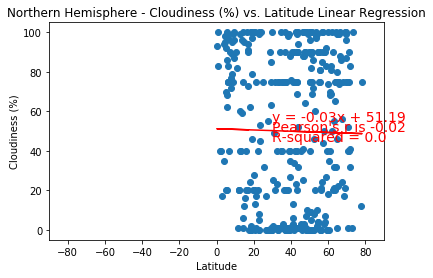

Analysis: There barely is any correlation between cloudiness and latitude in the Northern hemisphere.


In [292]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude 
regression(north_hemisphere_lat["Latitudes"], north_hemisphere_lat["Cloudiness (%)"])

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/Images/9. Northern Hemisphere - Cloudiness (%) vs. Latitude.png")
plt.show()

print("Analysis: There barely is any correlation between cloudiness and latitude in the Northern hemisphere.")

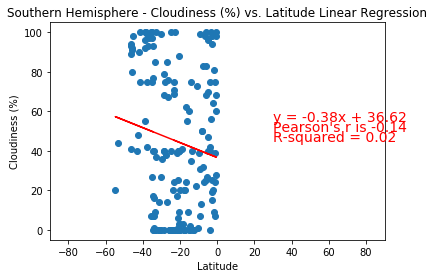

Analysis: There is a weak negative correlation between cloudiness and latitude in the Southern hemisphere.


In [293]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude 
regression(south_hemisphere_lat["Latitudes"], south_hemisphere_lat["Cloudiness (%)"])

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/Images/10. Southern Hemisphere - Cloudiness (%) vs. Latitude.png")
plt.show()

print("Analysis: There is a weak negative correlation between cloudiness and latitude in the Southern hemisphere.")

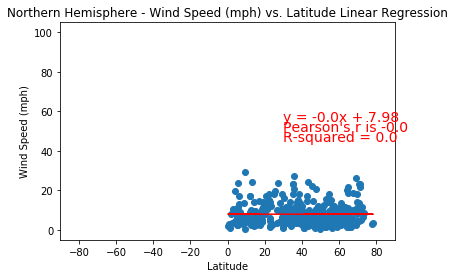

Analysis: There barely is any correlation between wind speed and latitude in the Northern hemisphere.


In [295]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude 
regression(north_hemisphere_lat["Latitudes"], north_hemisphere_lat["Wind Speed (mph)"])

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("output_data/Images/11. Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")
plt.show()

print("Analysis: There barely is any correlation between wind speed and latitude in the Northern hemisphere.")

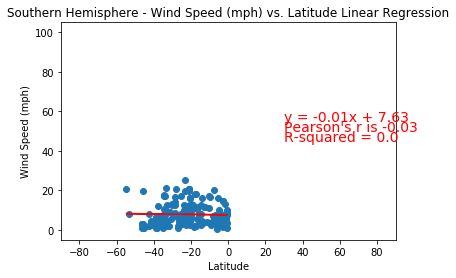

Analysis: There barely is any correlation between wind speed and latitude in the Southern hemisphere.


In [297]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
regression(south_hemisphere_lat["Latitudes"], south_hemisphere_lat["Wind Speed (mph)"])

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("output_data/Images/12. Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")
plt.show()

print("Analysis: There barely is any correlation between wind speed and latitude in the Southern hemisphere.")

# Observations 
### Trend 1: The closer to the equator (the closer the latitude is to 0 degree), the higher the temperature is in the city, because of the reception of the sunlight. The higher the latitude is, the colder it is. Latitude is proven to be one of the main factors affecting temperature (especially in the Southern Hemisphere). 
### Trend 2: Humidity, cloudiness, wind speed are very weakly (if at all) relevant to latitude.
### Trend 3: Southern Hemisphere climates tend to be milder than the climates in the Northern Hemisphere at similar latitudes . One of the biggest factor in differences in the climate in the Northern and Southern Hemispheres has to do with the distribution of land vs. ocean; water's temperatures heats up or cools down more slowly than land. Also, opposite hemispheres have opposite seasons. 